# Choose an appropriate dataset for classification and explore (apply, evaluate and compare) classification methods (Naive Bayes, KNN, SVM).

In [92]:
#import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import parallel_coordinates

#Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [93]:
# Reading dataset
df = pd.read_csv("tips.csv")

# describe the dataset before cleaning
print("Data before cleaning")
print(df.describe())


Data before cleaning
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [94]:
# cleaning the data
# 1 - drop rows with missing value of "total_bill" ,"size","tip" columns
df.dropna(subset=['total_bill'], inplace = True)
df.dropna(subset=['tip'], inplace = True)
df.dropna(subset=['size'], inplace = True)
# 2 - drop duplicated rows
df.drop_duplicates(inplace=True)
# after cleaning
print("Data after cleaning")
print(df.describe())

Data after cleaning
       total_bill         tip        size
count  243.000000  243.000000  243.000000
mean    19.813868    3.002387    2.572016
std      8.910071    1.385002    0.952356
min      3.070000    1.000000    1.000000
25%     13.380000    2.000000    2.000000
50%     17.810000    2.920000    2.000000
75%     24.175000    3.575000    3.000000
max     50.810000   10.000000    6.000000


In [95]:
# reset the index after data cleaning 
# because one-hot encoding maps values by index
df.reset_index(inplace=True, drop=True)

In [96]:
# applying one-hot encoding on the "sex" column
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
column_encoded = label_encoder.fit_transform(df['sex'])
column_reshaped = column_encoded.reshape(len(column_encoded), 1)

onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first', categories='auto')
column_onehot_encoded = onehot_encoder.fit_transform(column_reshaped)

ohe_df = pd.DataFrame(column_onehot_encoded)
df = df.join(ohe_df)
df = df.rename({0: "Female"}, axis=1)
df.drop(columns=['sex'], inplace=True)
print(df)

     total_bill   tip smoker   day    time  size  Female
0         16.99  1.01     No   Sun  Dinner     2     0.0
1         10.34  1.66     No   Sun  Dinner     3     1.0
2         21.01  3.50     No   Sun  Dinner     3     1.0
3         23.68  3.31     No   Sun  Dinner     2     1.0
4         24.59  3.61     No   Sun  Dinner     4     0.0
..          ...   ...    ...   ...     ...   ...     ...
238       29.03  5.92     No   Sat  Dinner     3     1.0
239       27.18  2.00    Yes   Sat  Dinner     2     0.0
240       22.67  2.00    Yes   Sat  Dinner     2     1.0
241       17.82  1.75     No   Sat  Dinner     2     1.0
242       18.78  3.00     No  Thur  Dinner     2     0.0

[243 rows x 7 columns]


In [97]:
# applying ordinal encoding on the "time" column 
islands_dict = {'Dinner': 0, 'Lunch': 1}
# setting the new column as int64 to make it appear in the heatmap below
df['time_ordinal'] = df.time.map(islands_dict).astype('int64')
df.drop(columns=['time'], inplace=True)
print(df)

     total_bill   tip smoker   day  size  Female  time_ordinal
0         16.99  1.01     No   Sun     2     0.0             0
1         10.34  1.66     No   Sun     3     1.0             0
2         21.01  3.50     No   Sun     3     1.0             0
3         23.68  3.31     No   Sun     2     1.0             0
4         24.59  3.61     No   Sun     4     0.0             0
..          ...   ...    ...   ...   ...     ...           ...
238       29.03  5.92     No   Sat     3     1.0             0
239       27.18  2.00    Yes   Sat     2     0.0             0
240       22.67  2.00    Yes   Sat     2     1.0             0
241       17.82  1.75     No   Sat     2     1.0             0
242       18.78  3.00     No  Thur     2     0.0             0

[243 rows x 7 columns]


In [98]:
#Frequency distribution of species
pd.crosstab(index=df["day"], columns="count")

col_0,count
day,
Fri,19
Sat,87
Sun,76
Thur,61


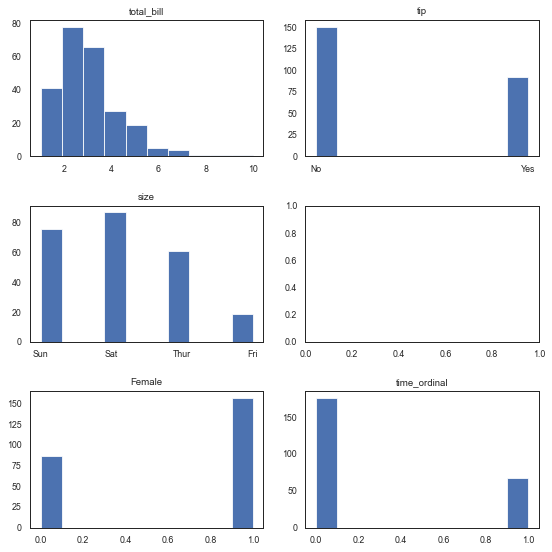

In [108]:
# Explore the TRAINING data

#Create histograms for each feature
n_bins = 10
fig, axs = plt.subplots(3, 2, figsize=(8, 8))
axs[0,0].hist(df.iloc[:,1].values, bins = n_bins)
axs[0,0].set_title('total_bill')
axs[0,1].hist(df.iloc[:,2].values, bins = n_bins)
axs[0,1].set_title('tip')
axs[1,0].hist(df.iloc[:,3].values, bins = n_bins)
axs[1,0].set_title('size')
axs[2,0].hist(df.iloc[:,5].values, bins = n_bins)
axs[2,0].set_title('Female')
axs[2,1].hist(df.iloc[:,6].values, bins = n_bins)
axs[2,1].set_title('time_ordinal')

# add some spacing between subplots
fig.tight_layout(pad=2.0)

In [152]:
# Feature selection
x1 = df.iloc[:,0:2].values
# print(x1)
x2 = df.iloc[:,4:].values

# x3 = df.iloc[:,3:]
# x4 = np.concatenate((x1, x2),axis=1)
x = np.concatenate((x1, x2),axis=1)
print(x)

y = df.iloc[:,3].values


# Split the data set before classification
# Train set: 70% of data to train the model
# Test set: 15% of data to test the model
# Validation set: 15% of data used to evaluate 
# the performance of each classifier and fine-tune 
# the model parameters
# Now we have small data set, therefore test set = validation set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

[[16.99  1.01  2.    0.    0.  ]
 [10.34  1.66  3.    1.    0.  ]
 [21.01  3.5   3.    1.    0.  ]
 ...
 [22.67  2.    2.    1.    0.  ]
 [17.82  1.75  2.    1.    0.  ]
 [18.78  3.    2.    0.    0.  ]]


In [153]:
# Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test) 
accuracy_nb = round(metrics.accuracy_score(y_test, Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test, Y_pred)
precision = metrics.precision_score(y_test, Y_pred, average='micro')
recall = metrics.recall_score(y_test, Y_pred, average='micro')
f1 = metrics.f1_score(y_test, Y_pred, average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[ 0  2  1  4]
 [ 0 18 10  0]
 [ 0 10 15  0]
 [ 0  0  0 13]]
accuracy_Naive Bayes: 0.630
precision_Naive Bayes: 0.630
recall_Naive Bayes: 0.630
f1-score_Naive Bayes : 0.630


Text(0, 0.5, 'Mean Error')

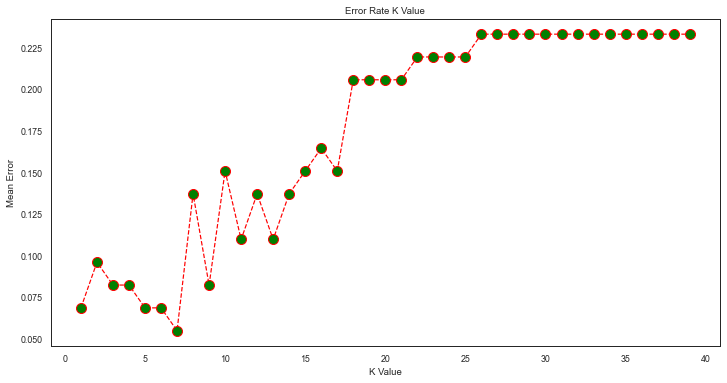

In [145]:
# K-NN (K-Nearest Neighbor)

# Determine optimal value for K
# Comparing error rate with K-value:
# calculate the mean of error for 
# all the predicted values where K ranges from 1 and 40

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
# Plot the error values against K values
# to find the best value for K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#Choose a K-value where mean error is closest to zero

<Figure size 432x288 with 0 Axes>

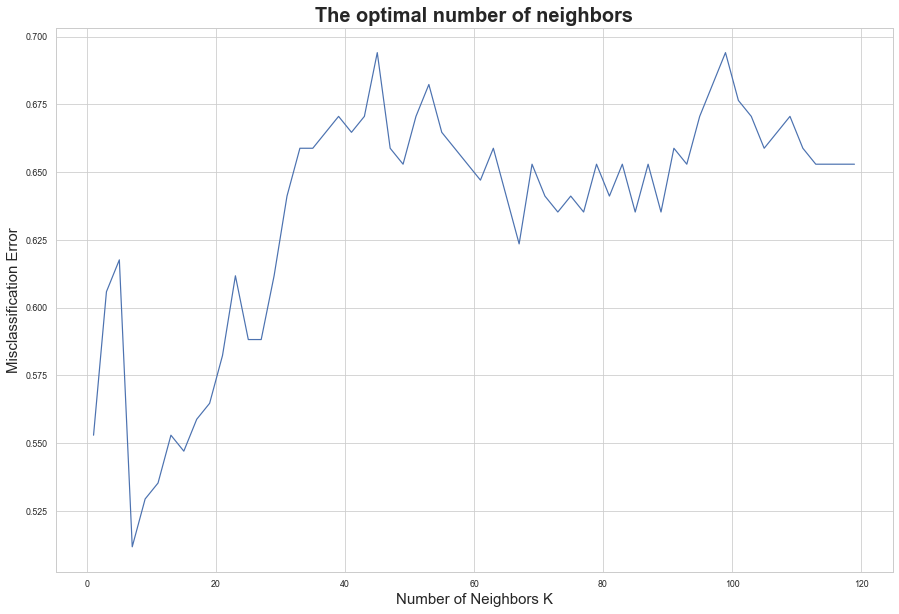

The optimal number of neighbors is 7.


In [154]:
# Using cross validation for parameter tuning

# creating list of K for KNN
k_list = list(range(1,120,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

# finding best K
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

In [147]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test) 
accuracy_knn=round(metrics.accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test,Y_pred)
precision = metrics.precision_score(y_test, Y_pred,average='micro')
recall = metrics.recall_score(y_test, Y_pred,average='micro')
f1 = metrics.f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[53  3]
 [ 2 15]]
accuracy_KNN : 0.932
precision_KNN : 0.932
recall_KNN: 0.932
f1-score_KNN : 0.932


In [155]:
# Support Vector Machine

# dualbool, default=True
# Select the algorithm to either solve the dual or primal optimization problem. 
# Prefer dual=False when n_samples > n_features.
linear_svc = LinearSVC(dual=False)
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
accuracy_svc=round(metrics.accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test,Y_pred)
precision = metrics.precision_score(y_test, Y_pred,average='micro')
recall = metrics.recall_score(y_test, Y_pred,average='micro')
f1 = metrics.f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[ 0  3  0  4]
 [ 0 15 13  0]
 [ 0 17  8  0]
 [ 0  0  0 13]]
accuracy_SVC: 0.493
precision_SVC: 0.493
recall_SVC: 0.493
f1-score_SVC : 0.493


In [156]:
# Comparing classification methods
results = pd.DataFrame({
    'Model': ['KNN', 
              'Naive Bayes',  
              'Support Vector Machine'],
    'Score': [acc_knn,
              acc_gaussian,  
              acc_linear_svc],
    "Accuracy_score":[accuracy_knn,
                      accuracy_nb,
                      accuracy_svc
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df

,Model,Score,Accuracy_score
0,KNN,100.00,93.15
1,Naive Bayes,64.71,63.01
2,Support Vector Machine,67.06,49.32
